In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import scipy

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [3]:
ab = '../talon/human_talon_abundance.tsv'
ver = 'v40_cerberus'

## What is the dist. of gene expression levels for detected polyA genes?

In [109]:
df = pd.read_csv(ab, sep='\t')
df, gids = get_tpm_table(df,
                   how='gene',
                   min_tpm=1,
                   gene_subset='polya')


Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 33772


In [111]:
# df.to_csv('gene_tpm_1_tpm_polya.tsv', sep='\t')

In [3]:
df = pd.read_csv('gene_tpm_1_tpm_polya.tsv', sep='\t')
df.set_index('gid_stable', inplace=True)
df.head()

,mcf7_1_1,k562_1_1,heart_right_ventricle_2_1,gm12878_3_1,heart_right_ventricle_3_1,pc3_1_1,lower_lobe_of_right_lung_1_1,hl60_m1_24hr_1_1,hl60_m1_24hr_1_2,hl60_m2_24hr_1_1,...,heart_right_ventricle_1_1,right_lobe_of_liver_2_1,hl60_1_1,hl60_1_2,pgp1_endo_1_1,pgp1_endo_1_2,left_cardiac_atrium_1_1,h9_neural_crest_1_1,h9_neural_crest_1_2,left_lung_2_1
gid_stable,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,23.789888,0.000000,10.241285,0.000000,6.720075,75.053876,17.669139,0.000000,0.000000,0.000000,...,17.559659,55.150354,0.000000,0.000000,130.696238,167.846857,27.101299,314.418880,297.255749,28.318303
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.929044,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.661850,0.000000,0.000000,1.758910,0.000000
ENSG00000000419,70.149669,47.127673,10.241285,36.975212,10.560118,28.866875,9.816189,86.001161,88.352860,63.175009,...,3.135653,1.969655,41.116152,23.675383,47.395339,28.251451,2.710130,80.916624,96.740037,32.566049
ENSG00000000457,12.199942,11.520098,4.726747,11.428702,4.800054,7.347932,7.198538,2.388921,2.912732,8.361398,...,10.034091,7.878622,28.132104,24.943708,5.744890,6.647400,5.420260,24.274987,22.865827,2.831830
ENSG00000000460,20.739902,50.793159,0.000000,22.185127,1.920022,3.149114,3.926475,5.972303,5.825463,6.503310,...,1.881392,1.969655,62.395564,54.537937,4.308667,4.985550,1.355065,108.659466,87.066033,0.000000


In [4]:
# get long format and only get genes expressed >= 1 tpm
df = df.melt(ignore_index=False, var_name='dataset', value_name='tpm')
print(len(df.index))
df = df.loc[df.tpm >= 1]
print(len(df.index))
df.reset_index(inplace=True)

4660536
2020689


In [5]:
# add metadata
meta = pd.read_csv('../lr_human_library_data_summary.tsv', sep='\t')
meta = meta[['dataset', 'tissue_or_cell_line', 'sample']]
df = df.merge(meta, on='dataset', how='left')

In [6]:
import numpy as np
from scipy.optimize import curve_fit

def powlaw(x, a, b):
    return a * np.power(x, b)




# def curve_fit_log(xdata, ydata) :
#     """Fit data to a power law with weights according to a log scale"""
#     # Weights according to a log scale
#     # Apply fscalex
#     xdata_log = np.log10(xdata)
#     # Apply fscaley
#     ydata_log = np.log10(ydata)
#     # Fit linear
#     popt_log, pcov_log = curve_fit(linlaw, xdata_log, ydata_log)
#     #print(popt_log, pcov_log)
#     # Apply fscaley^-1 to fitted data
#     ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))
#     # There is no need to apply fscalex^-1 as original data is already available
#     return (popt_log, pcov_log, ydatafit_log)

In [13]:
# make a plot and calc slope for each different library
slope_df = pd.DataFrame(columns=['dataset', 'sample', 'classification', 'slope', 'exp'])

for lib in df.dataset.unique().tolist():
    temp = df.loc[df.dataset==lib]

    # get metadata
    sample = temp['sample'].values[0]
    classification = temp['tissue_or_cell_line'].values[0]

    # bin the TPMs
    bin_min = 1
    bin_width = 10
    bin_max = math.ceil(df.tpm.max(axis=0)+bin_width)
    bins = [i for i in range(bin_min, bin_max, bin_width)]
    temp['tpm_bin'] = pd.cut(temp.tpm, bins)  
    
    # count the genes / bin
    temp2 = temp.copy(deep=True)
    temp2.reset_index(inplace=True)
    temp2 = temp2[['gid_stable', 'tpm_bin']].groupby('tpm_bin').count().reset_index()
    temp2['tpm_bin'] = temp2.tpm_bin.astype(str)
    temp2.rename({'gid_stable': 'n_genes'}, axis=1, inplace=True)
    temp2 = temp2.loc[temp2.n_genes != 0]
    
    # get bin starts, ends, and avgs.
    temp2['bin_start'] = temp2.tpm_bin.str.split('(',expand=True)[1].str.split(',',expand=True)[0].astype(int)
    temp2['bin_end'] = temp2.tpm_bin.str.rsplit(']',expand=True)[0].str.split(', ',expand=True)[1].astype(int)
    temp2['bin_middle'] = (temp2.bin_end+temp2.bin_start)/2
    
    # log10 each value and fit a linear curve
    temp2['log_bin_middle'] = np.log10(temp2.bin_middle)
    temp2['log_n_genes'] = np.log10(temp2.n_genes)

    x = 'log_bin_middle'
    y = 'log_n_genes'

    # get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp2[x],temp2[y])
    label = 'm={0:.1f}'.format(slope)
    
    # f, ax = plt.subplots(figsize=(6,6))
    # sns.set_context('paper', font_scale=1.8)
#     ax = sns.regplot(data=temp2, x='log_bin_middle',
#                     y='log_n_genes', ax=ax,
#                     scatter_kws={'s': 100},
#                     line_kws={'label':"m={0:.1f}".format(slope)})

#     _ = plt.ylim(0-0.5, temp2[y].max()+0.5)
#     ylabel = 'log10(# genes)'
#     xlabel = 'log10(TPM)'
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)

#     ax.set(ylabel=ylabel, xlabel=xlabel)

    # also find power relationship
    x = 'bin_middle'
    y = 'n_genes'
    
    popt, pcov = scipy.optimize.curve_fit(powlaw, temp2[x], temp2[y])
    exp = popt[1]
    
    # popt_log, pcov_log, ydatafit_log = curve_fit_log(temp2[x], temp2[y])

    # save info in table
    d = {'sample': sample,
         'dataset': lib,
         'slope': slope, 
         'exp': exp,
         'classification': classification}
    temp3 = pd.DataFrame.from_dict(d, orient='index').transpose()
    slope_df = pd.concat([slope_df, temp3])

In [15]:
slope_df.head()

,dataset,sample,classification,slope,exp
0,mcf7_1_1,mcf7,cell_line,-1.46476,-1.133979
0,k562_1_1,k562,cell_line,-1.662673,-1.139979
0,heart_right_ventricle_2_1,heart,tissue,-1.255176,-1.148549
0,gm12878_3_1,gm12878,cell_line,-1.553772,-1.086308
0,heart_right_ventricle_3_1,heart,tissue,-1.342274,-1.10839


In [16]:
tc_c_dict, tc_order = get_tissue_cell_line_colors()
c_dict, order = get_biosample_colors()

In [19]:
    sns.set_context('paper', font_scale=1.8)

[Text(3.075000000000003, 0.5, 'Slope of log-log gene TPM vs. gene count'),
 [Text(0, 0, 'Cell line'), Text(1, 0, 'Tissue')],
 Text(0.5, 7.496874999999999, '')]

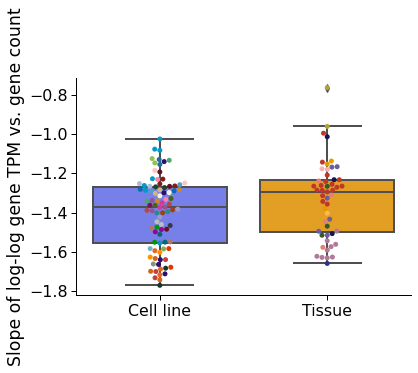

In [20]:
ax = sns.boxplot(slope_df, x='classification', y='slope', palette=tc_c_dict, order=tc_order,
                 saturation=1, linewidth=2)
ax2 = sns.swarmplot(slope_df, y='slope', x='classification', hue='classification', palette=tc_c_dict,
              order=tc_order, s=5)

first_c = True
for i in range(len(ax.collections)):
    if isinstance(ax.collections[i], mpl.collections.PolyCollection):
        if first_c:
            key = 'cell_line'
        else:
            key = 'tissue'
        c = tc_c_dict[key]
        ax.collections[i].set_edgecolor(c)  
        first_c = False
    
n_t = len(slope_df.loc[slope_df.classification=='tissue'].index)
n_c = len(slope_df.loc[slope_df.classification=='cell_line'].index)
d = {n_t: 'tissue', n_c: 'cell_line'}
for i in range(len(ax2.collections)):
    if isinstance(ax2.collections[i], mpl.collections.PathCollection):
        try: 
            cl = d[len(ax2.collections[i].properties()['facecolor'])]
        except: continue
        colors = [c_dict[c] for c in slope_df.loc[slope_df.classification==cl, 'sample'].tolist()]
        ax2.collections[i].set_color(colors)
        
ax.get_legend().remove()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xticks = ['Cell line', 'Tissue']
ax.set(xticklabels=xticks, xlabel='', ylabel='Slope of log-log gene TPM vs. gene count')


[Text(3.075000000000003, 0.5, 'Best fit power law exponent \n of gene TPM vs. gene count'),
 [Text(0, 0, 'Cell line'), Text(1, 0, 'Tissue')],
 Text(0.5, 7.496874999999999, '')]

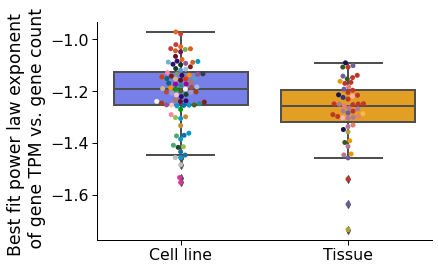

In [22]:
ax = sns.boxplot(slope_df, x='classification', y='exp', palette=tc_c_dict, order=tc_order,
                 saturation=1, linewidth=2)
ax2 = sns.swarmplot(slope_df, y='exp', x='classification', hue='classification', palette=tc_c_dict,
              order=tc_order, s=5)

first_c = True
for i in range(len(ax.collections)):
    if isinstance(ax.collections[i], mpl.collections.PolyCollection):
        if first_c:
            key = 'cell_line'
        else:
            key = 'tissue'
        c = tc_c_dict[key]
        ax.collections[i].set_edgecolor(c)  
        first_c = False
    
n_t = len(slope_df.loc[slope_df.classification=='tissue'].index)
n_c = len(slope_df.loc[slope_df.classification=='cell_line'].index)
d = {n_t: 'tissue', n_c: 'cell_line'}
for i in range(len(ax2.collections)):
    if isinstance(ax2.collections[i], mpl.collections.PathCollection):
        try: 
            cl = d[len(ax2.collections[i].properties()['facecolor'])]
        except: continue
        colors = [c_dict[c] for c in slope_df.loc[slope_df.classification==cl, 'sample'].tolist()]
        ax2.collections[i].set_color(colors)
        
ax.get_legend().remove()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xticks = ['Cell line', 'Tissue']
ax.set(xticklabels=xticks, xlabel='', ylabel='Best fit power law exponent \n of gene TPM vs. gene count')


In [159]:
## get power coefficient or w/e of power curve
# scipy curve_fit
# should be an option to fit a powerlaw curve to it
# and get some variable that describes how quickly the decay happens

In [160]:
## get slope of log

Slope of correlation: -1.4647595359405556
    dataset sample classification    slope
0  mcf7_1_1   mcf7      cell_line -1.46476


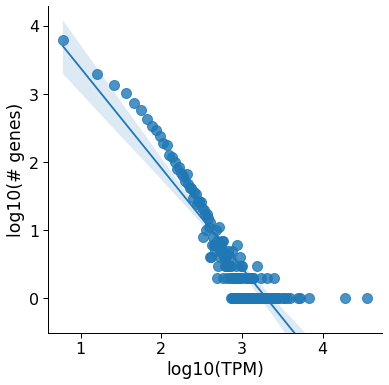

In [5]:
# ax = sns.displot(data=df, x='log2(TPM)', kind='kde', hue='variable')

## Generate list of polya, >=1 TPM genes

In [5]:
df = pd.read_csv(ab, sep='\t')
df, gids = get_tpm_table(df,
                   how='gene',
                   min_tpm=1,
                   gene_subset='polya')
# df.to_csv('gene_det_1_tpm.tsv', sep='\t')


Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 33772


In [9]:
df.reset_index(inplace=True)
df = df[['gid_stable']]
df.head()

,gid_stable
0,ENSG00000000003
1,ENSG00000000005
2,ENSG00000000419
3,ENSG00000000457
4,ENSG00000000460


In [10]:
df.to_csv('polya_expressed_gids.tsv', sep='\t', index=False)

## GO on protein coding genes that are not detected at >= 1 TPM

In [11]:
# get detected genes w/o subsetting on polyA genes
df = pd.read_csv(ab, sep='\t')
df, gids = get_tpm_table(df,
                   how='gene',
                   min_tpm=1, 
                   gene_subset='protein_coding')
df['detected'] = True

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1854: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1853: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 18727


In [13]:
df_back= df.copy(deep=True)

In [14]:
df.head()

,mcf7_1_1,k562_1_1,heart_right_ventricle_2_1,gm12878_3_1,heart_right_ventricle_3_1,pc3_1_1,lower_lobe_of_right_lung_1_1,hl60_m1_24hr_1_1,hl60_m1_24hr_1_2,hl60_m2_24hr_1_1,...,right_lobe_of_liver_2_1,hl60_1_1,hl60_1_2,pgp1_endo_1_1,pgp1_endo_1_2,left_cardiac_atrium_1_1,h9_neural_crest_1_1,h9_neural_crest_1_2,left_lung_2_1,detected
gid_stable,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,23.789888,0.000000,10.241285,0.000000,6.720075,75.053876,17.669139,0.000000,0.000000,0.000000,...,55.150354,0.000000,0.000000,130.696238,167.846857,27.101299,314.418880,297.255749,28.318303,True
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.929044,...,0.000000,0.000000,0.000000,0.000000,1.661850,0.000000,0.000000,1.758910,0.000000,True
ENSG00000000419,70.149669,47.127673,10.241285,36.975212,10.560118,28.866875,9.816189,86.001161,88.352860,63.175009,...,1.969655,41.116152,23.675383,47.395339,28.251451,2.710130,80.916624,96.740037,32.566049,True
ENSG00000000457,12.199942,11.520098,4.726747,11.428702,4.800054,7.347932,7.198538,2.388921,2.912732,8.361398,...,7.878622,28.132104,24.943708,5.744890,6.647400,5.420260,24.274987,22.865827,2.831830,True
ENSG00000000460,20.739902,50.793159,0.000000,22.185127,1.920022,3.149114,3.926475,5.972303,5.825463,6.503310,...,1.969655,62.395564,54.537937,4.308667,4.985550,1.355065,108.659466,87.066033,0.000000,True


In [17]:
gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene')
gene_df.reset_index(inplace=True)
gene_df['gid'] = cerberus.get_stable_gid(gene_df, 'gid')

,index,gid,gname,length,biotype,biotype_category,tf,MANE_Select,MANE_Plus_Clinical
0,0,ENSG00000000460,C1orf112,192174,protein_coding,protein_coding,False,False,False
1,1,ENSG00000000971,CFH,100823,protein_coding,protein_coding,False,False,False
2,2,ENSG00000001461,NIPAL3,57275,protein_coding,protein_coding,False,False,False
3,3,ENSG00000004487,KDM1A,64347,protein_coding,protein_coding,False,False,False
4,4,ENSG00000007933,FMO3,27019,protein_coding,protein_coding,False,False,False


In [18]:
df = df.merge(gene_df, how='outer', left_index=True, right_on='gid')
df.detected = df.detected.fillna(False)

In [19]:
print(len(df.index))
df = df.loc[df.biotype_category == 'protein_coding']
print(len(df.index))

61544
19988


In [20]:
dbs = ['GO_Biological_Process_2021',
       'GO_Cellular_Component_2021',
       'GO_Molecular_Function_2021',
       'KEGG_2021_Human',
       'KEGG_2019_Human']
bm = gp.parser.Biomart()
datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
datasets.loc[datasets.Description.str.contains('Human')]

,Name,Description
37,hsapiens_gene_ensembl,Human genes (GRCh38.p13)


In [21]:
df.loc[df.detected]

,mcf7_1_1,k562_1_1,heart_right_ventricle_2_1,gm12878_3_1,heart_right_ventricle_3_1,pc3_1_1,lower_lobe_of_right_lung_1_1,hl60_m1_24hr_1_1,hl60_m1_24hr_1_2,hl60_m2_24hr_1_1,...,detected,index,gid,gname,length,biotype,biotype_category,tf,MANE_Select,MANE_Plus_Clinical
59780,23.789888,0.000000,10.241285,0.000000,6.720075,75.053876,17.669139,0.000000,0.000000,0.000000,...,True,59780,ENSG00000000003,TSPAN6,12984,protein_coding,protein_coding,False,False,False
58523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.929044,...,True,58523,ENSG00000000005,TNMD,15050,protein_coding,protein_coding,False,False,False
35380,70.149669,47.127673,10.241285,36.975212,10.560118,28.866875,9.816189,86.001161,88.352860,63.175009,...,True,35380,ENSG00000000419,DPM1,24374,protein_coding,protein_coding,False,False,False
2828,12.199942,11.520098,4.726747,11.428702,4.800054,7.347932,7.198538,2.388921,2.912732,8.361398,...,True,2828,ENSG00000000457,SCYL3,44737,protein_coding,protein_coding,False,False,False
0,20.739902,50.793159,0.000000,22.185127,1.920022,3.149114,3.926475,5.972303,5.825463,6.503310,...,True,0,ENSG00000000460,C1orf112,192174,protein_coding,protein_coding,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53526,1.219994,1.047282,0.000000,1.344553,0.000000,1.574557,2.617650,1.194461,0.970911,0.000000,...,True,53526,ENSG00000285953,ENSG00000285953,101321,protein_coding,protein_coding,False,False,False
48867,281.818670,289.573369,74.840157,209.078020,67.200753,154.306570,152.478130,43.000581,38.836422,26.942283,...,True,48867,ENSG00000285976,ENSG00000285976,11216,protein_coding,protein_coding,False,False,False
47332,1.829991,0.523641,0.000000,6.050489,0.000000,0.524852,0.000000,0.000000,0.000000,0.000000,...,True,47332,ENSG00000285978,ENSG00000285978,34831,protein_coding,protein_coding,False,False,False
56065,4.269980,1.570922,0.787791,2.016830,0.000000,12.596455,1.963238,9.555685,6.796374,4.645221,...,True,56065,ENSG00000285982,ENSG00000285982,103338,protein_coding,protein_coding,False,False,False


In [22]:
gids = df.loc[~df.detected, 'gid'].str.rsplit('.', n=1, expand=True)[0].to_frame()
print(len(gids))
gids = gids.squeeze().str.strip().tolist()
gids = bm.query(dataset='hsapiens_gene_ensembl',
           attributes=['ensembl_gene_id', 'external_gene_name'],
           filters={'ensembl_gene_id': gids})
gids = gids.loc[~gids.external_gene_name.isna()]
gnames = gids.external_gene_name.squeeze().str.strip().tolist()
go = gp.enrichr(gene_list=gnames,
                gene_sets=dbs,
                organism='Human',
                description='undet_genes',
                outdir='undet_genes_GO',
                cutoff=0.5)

1261


In [28]:
fig_dir = '/Users/fairliereese/Documents/programming/mortazavi_lab/documents/rnawg/fig1/'

In [29]:
def rm_go_number(df):
    df['term'] = df['Term'].str.split('\(GO', expand=True)[0]
    return df

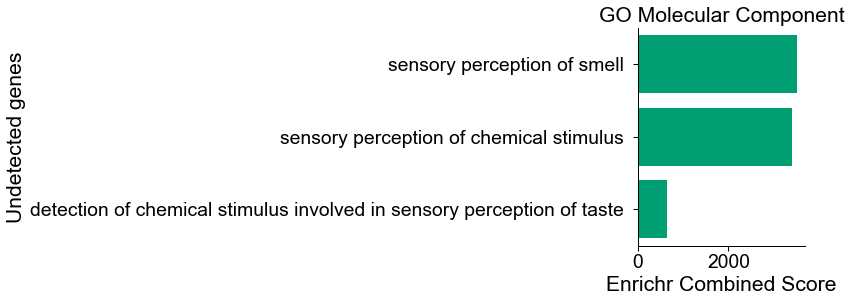

In [31]:
# GO on undetected protein-coding genes
df = pd.read_csv('undet_genes_GO/GO_Biological_Process_2021.Human.enrichr.reports.txt', sep='\t')
n = 3
df = df.head(n)
df = rm_go_number(df)
color = get_talon_nov_colors()[0]['Known']


sns.set_context('paper', font_scale=2.2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(3,4))
ax = sns.barplot(data=df, x='Combined Score', y='term', color=color, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(title='GO Molecular Component')

xlabel = 'Enrichr Combined Score'
ylabel = 'Undetected genes'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)
fname = f'{fig_dir}/undet_genes_go.pdf'
plt.savefig(fname, dpi=500, bbox_inches='tight')

## PolyA gene detection at 0, 1, and 100 TPM


Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1599: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1598: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Applying gene type and novelty subset
Number of genes reported: 39681
Detected 39681 / 52274 (75.9%) annotated polyA genes
protein_coding
93.69121472883731

lncRNA
60.36173089925625

pseudogene
29.797771357820885



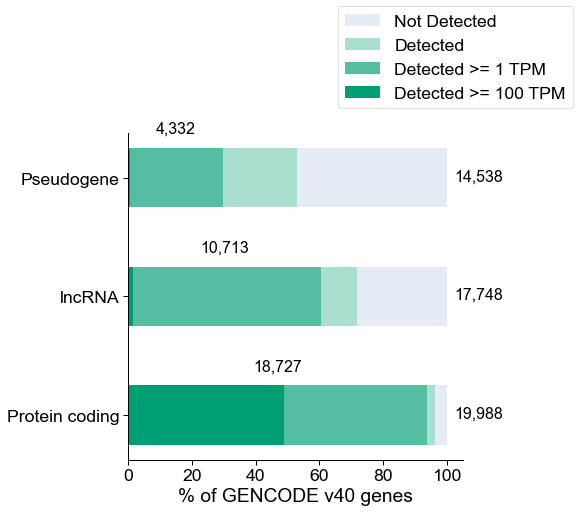

In [3]:
df = pd.read_csv(ab, sep='\t')
plot_gene_det_by_biotype_tpm(df, how='gene', ver=ver)

## HOX gene detection

In [3]:
# df = pd.read_csv(ab, sep='\t')
# df = get_det_table(df,
#                    groupby='sample',
#                    how='gene',
#                    min_tpm=1,
#                    gene_subset='polya')
# df = df.transpose()
# df.to_csv('gene_det_1_tpm.tsv', sep='\t')


In [5]:
df = pd.read_csv('gene_det_1_tpm.tsv', sep='\t')

In [6]:
df.rename({'index': 'gid_stable'}, axis=1, inplace=True)

In [7]:
gene_df, _, _ = get_gtf_info(how='gene', subset='polya', ver=ver, add_stable_gid=True)
gene_df = gene_df[['gid_stable', 'gname', 'biotype_category']]
df = df.merge(gene_df, how='left', on='gid_stable')
df.reset_index(inplace=True)

In [8]:
df.head()

,index,Unnamed: 0,gid_stable,a673,adipose,adrenal gland,brain,caco2,calu3,colon,...,pc3,pc9,pgp1,pgp1_astro,pgp1_endo,pgp1_excite_neuron,vessels,wtc11,gname,biotype_category
0,0,0,ENSG00000000003,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,TSPAN6,protein_coding
1,1,1,ENSG00000000005,False,True,False,True,False,False,True,...,False,False,True,False,True,False,True,True,TNMD,protein_coding
2,2,2,ENSG00000000419,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,DPM1,protein_coding
3,3,3,ENSG00000000457,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,SCYL3,protein_coding
4,4,4,ENSG00000000460,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,C1orf112,protein_coding


52
['HOXA11' 'HOXC8' 'HOXA9' 'HOXA1' 'HOXA2' 'HOXA3' 'HOXA5' 'HOXA6' 'HOXA13'
 'HOXB6' 'HOXB8' 'HOXB5' 'HOXB3' 'HOXB1' 'HOXA7' 'HOXC13' 'HOXC11'
 'HOXC12' 'HOXD1' 'HOXD3' 'HOXD9' 'HOXD10' 'HOXD11' 'HOXD13' 'HOXB13'
 'HOXD4' 'HOXD12' 'HOXB9' 'HOXC5' 'HOXB2' 'HOXD8' 'HOXC9' 'HOXC10' 'HOXB4'
 'HOXA4' 'HOXC6' 'HOXC4' 'HOXB-AS1' 'HOXB-AS3' 'HOXD-AS2' 'HOXB-AS2'
 'HOXA11-AS' 'HOXB-AS4' 'HOXC13-AS' 'HOXC-AS2' 'HOXC-AS1' 'HOXC-AS3'
 'HOXA10-AS' 'HOXA10' 'HOXA-AS2' 'HOXA-AS3' 'HOXB7']


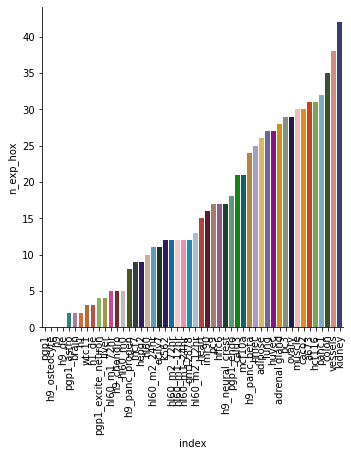

In [11]:
temp = df.loc[df.gname.str.startswith('HOX')]
print(len(temp.gname.unique()))
print(temp.gname.unique())
temp.drop(['index', 'Unnamed: 0', 'gid_stable', 'biotype_category'], axis=1, inplace=True)
temp.set_index('gname', inplace=True)
temp = temp.transpose()
temp['n_exp_hox'] = temp.sum(axis=1)
temp = temp.sort_values(by='n_exp_hox', ascending=True)
temp.reset_index(inplace=True)
c_dict, order = get_biosample_colors()
# sns.set(rc={'figure.figsize':(8,11)})
g = sns.catplot(data=temp, y='n_exp_hox', x='index',kind='bar',palette=c_dict)
_ = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.savefig('figures/n_hox_genes_by_sample.png', dpi=500)

52
['HOXA11' 'HOXC8' 'HOXA9' 'HOXA1' 'HOXA2' 'HOXA3' 'HOXA5' 'HOXA6' 'HOXA13'
 'HOXB6' 'HOXB8' 'HOXB5' 'HOXB3' 'HOXB1' 'HOXA7' 'HOXC13' 'HOXC11'
 'HOXC12' 'HOXD1' 'HOXD3' 'HOXD9' 'HOXD10' 'HOXD11' 'HOXD13' 'HOXB13'
 'HOXD4' 'HOXD12' 'HOXB9' 'HOXC5' 'HOXB2' 'HOXD8' 'HOXC9' 'HOXC10' 'HOXB4'
 'HOXA4' 'HOXC6' 'HOXC4' 'HOXB-AS1' 'HOXB-AS3' 'HOXD-AS2' 'HOXB-AS2'
 'HOXA11-AS' 'HOXB-AS4' 'HOXC13-AS' 'HOXC-AS2' 'HOXC-AS1' 'HOXC-AS3'
 'HOXA10-AS' 'HOXA10' 'HOXA-AS2' 'HOXA-AS3' 'HOXB7']


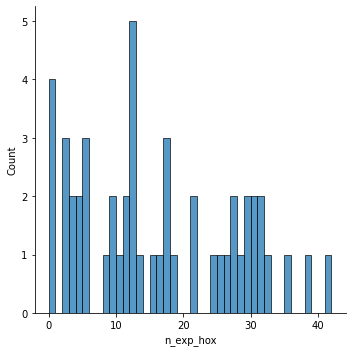

In [20]:
temp = df.loc[df.gname.str.startswith('HOX')]
print(len(temp.gname.unique()))
print(temp.gname.unique())
temp.drop(['index', 'Unnamed: 0', 'gid_stable', 'biotype_category'], axis=1, inplace=True)
temp.set_index('gname', inplace=True)
temp = temp.transpose()
temp['n_exp_hox'] = temp.sum(axis=1)
sns.displot(data=temp, x='n_exp_hox',binwidth=1)
plt.savefig('figures/n_hox_genes_hist.png', dpi=500)

15
['HOXA11' 'HOXA9' 'HOXA1' 'HOXA2' 'HOXA3' 'HOXA5' 'HOXA6' 'HOXA13' 'HOXA7'
 'HOXA4' 'HOXA11-AS' 'HOXA10-AS' 'HOXA10' 'HOXA-AS2' 'HOXA-AS3']


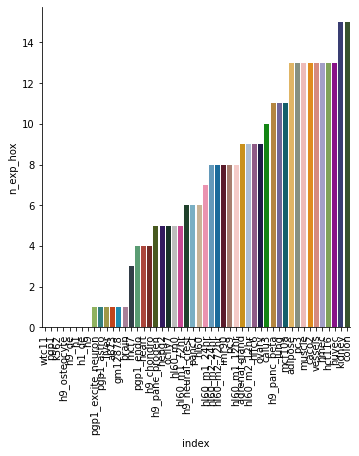

In [12]:
temp = df.loc[df.gname.str.startswith('HOXA')]
print(len(temp.gname.unique()))
print(temp.gname.unique())
temp.drop(['index', 'Unnamed: 0', 'gid_stable', 'biotype_category'], axis=1, inplace=True)
temp.set_index('gname', inplace=True)
temp = temp.transpose()
temp['n_exp_hox'] = temp.sum(axis=1)
temp = temp.sort_values(by='n_exp_hox', ascending=True)
temp.reset_index(inplace=True)
c_dict, order = get_biosample_colors()
# sns.set(rc={'figure.figsize':(8,11)})
g = sns.catplot(data=temp, y='n_exp_hox', x='index',kind='bar',palette=c_dict)
_ = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.savefig('figures/n_hox_a_genes_by_sample.png', dpi=500)

15
['HOXA11' 'HOXA9' 'HOXA1' 'HOXA2' 'HOXA3' 'HOXA5' 'HOXA6' 'HOXA13' 'HOXA7'
 'HOXA4' 'HOXA11-AS' 'HOXA10-AS' 'HOXA10' 'HOXA-AS2' 'HOXA-AS3']


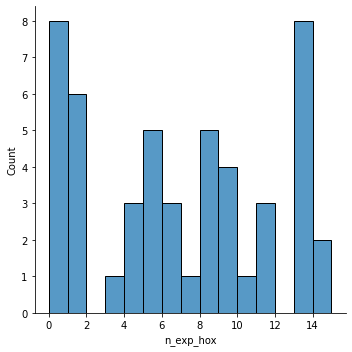

In [19]:
temp = df.loc[df.gname.str.startswith('HOXA')]
print(len(temp.gname.unique()))
print(temp.gname.unique())
temp.drop(['index', 'Unnamed: 0', 'gid_stable', 'biotype_category'], axis=1, inplace=True)
temp.set_index('gname', inplace=True)
temp = temp.transpose()
temp['n_exp_hox'] = temp.sum(axis=1)
sns.displot(data=temp, x='n_exp_hox',binwidth=1)
plt.savefig('figures/n_hox_a_genes_hist.png', dpi=500)

## PolyA gene detection

What fraction of polyA genes from the annotation do we detect with >= 1 TPM in any library?

In [3]:
df = pd.read_csv(ab, sep='\t')
df, inds = get_tpm_table(df,
                   how='gene',
                   min_tpm=1,
                   gene_subset='polya')

gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene', ver=ver)

polya_biotypes = ['protein_coding', 'pseudogene', 'lncRNA']
polya_genes = gene_df.loc[gene_df.biotype_category.isin(polya_biotypes), 'gid'].tolist()
n_polya = len(polya_genes)
n_det_polya = len(df.index)

print('Detected {} / {} ({:.3}%) annotated polyA genes'.format(n_det_polya, n_polya, (n_det_polya/n_polya)*100))

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1478: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1477: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 33772
Detected 33772 / 52274 (64.6%) annotated polyA genes


In [4]:
gene_df, _, _ = get_gtf_info(how='gene', subset='polya', ver=ver, add_stable_gid=True)
gene_df = gene_df[['gid_stable', 'gname', 'biotype_category']]

df.reset_index(inplace=True)
df = df.merge(gene_df, how='left', on='gid_stable')

df = df[['gid_stable', 'biotype_category']].groupby('biotype_category').count()
df.rename({'gid_stable':'obs_counts'}, axis=1, inplace=True)

gene_df = gene_df[['gid_stable', 'biotype_category']].groupby('biotype_category').count()
gene_df.rename({'gid_stable':'annot_counts'}, axis=1, inplace=True)
df = df.merge(gene_df, how='left', left_index=True, right_index=True)

df['perc'] = (df.obs_counts/df.annot_counts)*100
df = df.sort_values(by='perc', ascending=False)
df

,obs_counts,annot_counts,perc
biotype_category,,,
protein_coding,18727,19988,93.691215
lncRNA,10713,17748,60.361731
pseudogene,4332,14538,29.797771


In [7]:
df.reset_index(inplace=True)

In [5]:
c = get_ic_nov_colors()[0]['Known']
c_dict, order = get_shade_colors(c, ['protein_coding', 'lncRNA', 'pseudogene'])

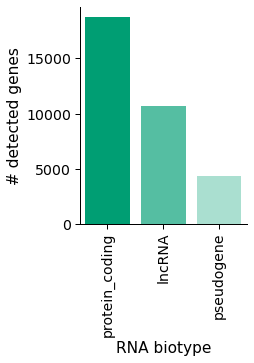

In [8]:
# plotting
sns.set_context('paper', font_scale=1.6)
plt.figure(figsize=(3,4))


ax = sns.barplot(data=df, y='obs_counts', x='biotype_category',
                 palette=c_dict, order=order,
                 saturation=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = 'RNA biotype'
ylabel = '# detected genes'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)
ax.tick_params(axis="x", rotation=90)


# fname = '{}_{}_support.png'.format(opref, feat)
# plt.savefig(fname, dpi=500, bbox_inches='tight')

How many polyA genes do we detect >= 100 TPM in any 1 sample? 

In [4]:
df = pd.read_csv(ab, sep='\t')
df, inds = get_tpm_table(df,
                   groupby='sample',
                   how='gene',
                   min_tpm=100,
                   gene_subset='polya')


gene_df, _, _ = get_gtf_info(how='gene', subset='polya', ver=ver, add_stable_gid=True)
polya_biotypes = ['protein_coding', 'pseudogene', 'lncRNA']
polya_genes = gene_df.loc[gene_df.biotype_category.isin(polya_biotypes), 'gid'].tolist()
n_polya = len(polya_genes)
n_det_polya = len(df.index)

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1463: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1462: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 100 tpm: 11176
Applying gene type and novelty subset
Averaging over biosample
Found 50 total samples
Number of genes reported: 10131


In [5]:
print('Detected {} / {} ({:.3}%) annotated polyA genes'.format(n_det_polya, n_polya, (n_det_polya/n_polya)*100))

gene_df, _, _ = get_gtf_info(how='gene', subset='polya', ver=ver, add_stable_gid=True)
gene_df = gene_df[['gid_stable', 'gname', 'biotype_category']]

df.index.name = 'annot_gene_id'
df.reset_index(inplace=True)
df['gid_stable'] = cerberus.get_stable_gid(df, 'annot_gene_id')
df = df.merge(gene_df, how='left', on='gid_stable')

df = df[['gid_stable', 'biotype_category']].groupby('biotype_category').count()
df.rename({'gid_stable':'obs_counts'}, axis=1, inplace=True)

gene_df = gene_df[['gid_stable', 'biotype_category']].groupby('biotype_category').count()
gene_df.rename({'gid_stable':'annot_counts'}, axis=1, inplace=True)
df = df.merge(gene_df, how='left', left_index=True, right_index=True)

df['perc'] = (df.obs_counts/df.annot_counts)*100
df = df.sort_values(by='perc', ascending=False)
df

Detected 10131 / 52274 (19.4%) annotated polyA genes


,obs_counts,annot_counts,perc
biotype_category,,,
protein_coding,9776,19988,48.909346
lncRNA,254,17748,1.431147
pseudogene,101,14538,0.694731


In [27]:
df.head()

biosample,index,a673,adipose,adrenal gland,brain,caco2,calu3,colon,gm12878,h1,...,ovary,panc1,pc3,pc9,pgp1,pgp1_astro,pgp1_endo,pgp1_excite_neuron,vessels,wtc11
0,ENSG00000000003.14,91.502783,118.123552,64.993329,11.302698,347.757386,170.246449,244.050202,0.199761,161.354309,...,95.081279,15.788161,75.053876,115.327269,121.852699,81.407854,149.271547,74.879355,17.373152,131.196822
1,ENSG00000000419.12,42.717698,18.387157,34.326836,27.202421,126.812943,68.914232,18.162833,81.267186,18.462523,...,18.565741,31.576322,28.866875,35.936605,48.384465,37.407601,37.823395,35.827986,14.561838,22.246875
2,ENSG00000000460.16,30.518670,1.671560,3.365819,3.748927,17.822383,40.940526,3.963509,42.876967,44.102917,...,3.738679,16.419687,3.149114,25.639317,18.341192,2.197551,4.647109,5.210468,3.562550,30.262557
3,ENSG00000000938.12,0.000000,50.703977,4.205407,4.691764,0.000000,0.000000,1.995934,83.473252,0.580638,...,2.752435,0.000000,0.000000,0.000000,1.369208,0.634120,0.830925,0.000000,11.932473,0.738960
4,ENSG00000000971.15,2.592035,48.475231,31.232974,17.980357,0.000000,23.877434,18.353658,0.000000,0.000000,...,221.288445,0.000000,2.624261,3.771192,0.000000,21.303144,32.078505,0.000000,116.995038,0.000000


In [10]:
gene_df, _, _ = get_gtf_info(how='gene', subset='polya', ver=ver, add_stable_gid=True)
gene_df = gene_df[['gid_stable', 'gname', 'biotype']]
df = df.merge(gene_df, how='left', on='gid_stable')

In [11]:
df.to_csv('polya_genes_100tpm.tsv', sep='\t', index=False)

In [12]:
df = pd.read_csv('polya_genes_100tpm.tsv', sep='\t')

## How many genes of each biotype category are there in the annotation and detected by us?

In [4]:
# get detected genes w/o subsetting on polyA genes
df = pd.read_csv(ab, sep='\t')
df, _ = get_tpm_table(df,
                   how='gene',
                   min_tpm=1)
gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene', ver=ver)

df = df.merge(gene_df, how='left', left_index=True, right_on='gid')
temp = df[['gid', 'biotype_category']].groupby('biotype_category').count()
temp.reset_index(inplace=True)
temp.rename({'gid': 'detected_counts'}, axis=1, inplace=True)

temp = temp.merge(b_cat_counts, on='biotype_category', how='outer')
temp['prop_detected'] = temp.detected_counts/temp.gencode_counts
temp.sort_values(by='prop_detected', ascending=False, inplace=True)
temp

Calculating gene TPM values
Subsetting for novelty categories ['Known']


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1375: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 36032


,biotype_category,detected_counts,gencode_counts,prop_detected
0,lncRNA,7272,17748,0.409736
4,pseudogene,3997,14538,0.274935
2,other,1664,7391,0.225139
1,miRNA,305,1879,0.162320
3,protein_coding,1262,19988,0.063138


In [6]:
print(1664+305)
print(7391+1879)
print(1969/9270)

1969
9270
0.21240560949298815


## How many genes in other biotype categories do we detect and what proportion of the annotation does this represent?

In [14]:
temp = df[['gid', 'biotype', 'biotype_category']].groupby(['biotype', 'biotype_category']).count()
temp.reset_index(inplace=True)
temp.rename({'gid': 'detected_counts'}, axis=1, inplace=True)

temp = temp.merge(b_counts, on='biotype', how='outer')
temp['prop_detected'] = temp.detected_counts/temp.gencode_counts
temp.sort_values(by='prop_detected', ascending=False, inplace=True)

## GO on *protein coding* genes that are not detected at >= 1 TPM

In [ ]:
# get detected genes w/o subsetting on polyA genes
df = pd.read_csv(ab, sep='\t')
df, _ = get_tpm_table(df,
                   how='gene',
                   min_tpm=1, 
                   gene_subset='polya')
df['detected'] = True

gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene', ver=ver)
df = df.merge(gene_df, how='outer', left_index=True, right_on='gid')
df.detected = df.detected.fillna(False)

print(len(df.index))
df = df.loc[df.biotype_category == 'protein_coding']
print(len(df.index))

In [ ]:
dbs = ['GO_Biological_Process_2021',
       'GO_Cellular_Component_2021',
       'GO_Molecular_Function_2021',
       'KEGG_2021_Human']
bm = gp.parser.Biomart()
datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
datasets.loc[datasets.Description.str.contains('Human')]

gids = df.loc[~df.detected, 'gid'].str.rsplit('.', n=1, expand=True)[0].to_frame()
gids = gids.squeeze().str.strip().tolist()
gids = bm.query(dataset='hsapiens_gene_ensembl',
           attributes=['ensembl_gene_id', 'external_gene_name'],
           filters={'ensembl_gene_id': gids})
gids = gids.loc[~gids.external_gene_name.isna()]
gnames = gids.external_gene_name.squeeze().str.strip().tolist()
go = gp.enrichr(gene_list=gnames,
                gene_sets=dbs,
                organism='Human',
                description='undet_genes',
                outdir='undet_genes_GO',
                cutoff=0.5)

## How many biosamples do we detect each detected gene in?


Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1599: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1598: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 33772
Found 50 total samples


biosample,a673,adipose,adrenal gland,brain,caco2,calu3,colon,gm12878,h1,h1_de,...,panc1,pc3,pc9,pgp1,pgp1_astro,pgp1_endo,pgp1_excite_neuron,vessels,wtc11,n_samples
ENSG00000000003,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,41
ENSG00000000005,False,True,False,True,False,False,True,False,True,False,...,False,False,False,True,False,True,False,True,True,16
ENSG00000000419,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,50
ENSG00000000457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,50
ENSG00000000460,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
ENSG00000285987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3
ENSG00000285988,False,False,False,False,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,11
ENSG00000285990,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,7


<Figure size 432x288 with 0 Axes>

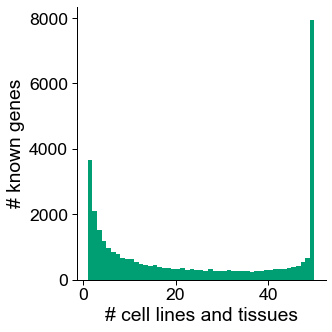

In [4]:
df = pd.read_csv(ab, sep='\t')
plot_biosamp_det(df,
                 how='gene',
                 min_tpm=1,
                 gene_subset='polya',
                 sample=None,
                 groupby='sample',
                 nov=['Known'],
                 opref='figures/human')